# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class.
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1542704

You have decided to form a startup called “LingoRank” with your University friend and become a millionaire. You have until the end the semester to create a proof of concept for your investors. Your startup will revolutionize the way people learn and get better at a foreign language.

### THE IDEA
You have noticed that to improve one’s skills in a new foreign language, it is important to read texts in that language. These texts have to be at the reader’s language level. However, it is difficult to find texts that are close to someone’s knowledge level (`A1 to C2`). You have decided to build a model for English speakers that predicts the difficulty of a French written text. This can be then used, e.g., in a recommendation system, to recommend texts, e.g, recent news articles that are appropriate for someone’s language level. If someone is at A1 French level, it is inappropriate to present a text at B2 level, as she won’t be able to understand it. Ideally, a text should have many known words and may have a few words that are unknown so that the person can improve.

### 🗄 DATA
You can find the training data and the unlabeled test data in the Data tab.

### 🚀 SUBMISSION
As you build your model and train it on the training data, you can generate predictions for the ( unlabelled ) test data. Make sure that your submission file has the same format as the `sample_submission.csv` file in the Data tab. Once you are sure about your model and satisfied with the prediction accuracy you got on your own test data, you can try to generate predictions for the actual test data and submit it to the competition.

As soon as you make a submission you can see the prediction accuracy and your ranking on the leaderboard. Note that you can only make 5 submissions per day. To know more about the competition rules, check out the rules tab.

### 🚚  DELIVERABLES

-    **Github**: A project GitHub page. There, report the following table *without doing any cleaning on the data*. Do hyper-parameter optimization to find the best solution. Your code should justify your results.

|  |  Logistic regression |  kNN | Decision Tree | Random Forests | Any other technique |
| --- | --- | --- | --- | --- |
|Precision |  | | | |
|  Recall |  | | | |
|  F1-score |  | | | |
|  Accuracy |  | | | | |  |  |



-    Which is the best model?
-    Show the confusion matrix.
-    Show examples of some erroneous predictions. Can you understand where the error is coming from?
-    Do some more analysis to better understand how your model behaves.
-    Have a position in the leaderboard of this competition

Then try to improve this solution and climb up the leaderboard ladder! Expected score results:

>0.46 -> Hm,….you could have tried harder…
>0.47 - 0.52 -> not bad, but you could have done better.
>0.56 - 0.57 -> You did your work
>0.7 -> You used text embeddings, very good
>0.78+ -> WOW!

- **User interface/application**: Think how to use the model in an application. Create a UI with streamlit. You are free to conceive and create whichever application you like with your text difficulty model.


-    **Video**: Create a YouTube video of your solution and embed it in your notebook. Imagine you are giving a presentation or a tutorial. The video should explain:
    -    The problem, your algorithm, how you determine the difficulty.
    -    An evaluation of your solution *accuracy, precision, recall, F1-score, etc*.
    -    A demo of your solution (the UI you implemented).

Upload the video on **Youtube** (set it as *unlisted* if you don't wish it to be publicly visible) and put the link to the video in the readme of the Github repository of your team.

### Tips:

Things you should considering trying are:
- data cleaning (maybe not so important in this dataset, but try!)
- data augmentation (sentence features, e.g., length, [cognates](https://www.fluentin3months.com/french-cognates/), POS, etc),
- use [text embeddings](https://huggingface.co/blog/getting-started-with-embeddings) (Bert, RoBerta, etc). That's your best bet for boosting prediction accuracy. First use a [static embeddings](https://www.kaggle.com/code/matleonard/word-vectors/notebook). Then you can use an embedding and post-train it ([transfer learning](https://spacy.io/usage/embeddings-transformers)) with our own data labels. This should give you (ideally!) the best results.

More ideas for those that wish to go the extra mile:
- Make an application that searches and ranks French YouTube videos using the captions.
- Create an interpretable model that highlights the difficulty of the words/phrases.

### 👩‍💻 LOGISTICS AND DEADLINE

First of all, create an account in kaggle (if you don't have one already). As you enter the competition page, under the Team tab you can merge your user account with your teammates in order to create a *team*. For selecting your team name, please follow the following guideline:

-    For students, participating from UNIL use: `UNIL_<your team name>`. For students from EPFL use: `EPFL_<your team name>`.

Your team name will be shown on the leaderboard and you can compare your score with other teams as you submit your solution. Make sure to mention your team name in your notebook.

###📱 CONTACT
-    Stergios
-    Ludovic

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful).

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [1]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# install Kaggle
! pip install kaggle

Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file, which you save on your Google Drive directy in my drive.

In [3]:
!mkdir ~/.kaggle

In [4]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


### if the next step fails, please refer to the documentation [available here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

In [5]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2023
from zipfile import ZipFile
with ZipFile('detecting-french-texts-difficulty-level-2023.zip','r') as zip:
  zip.extractall(path="")

  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 13.2MB/s]


In [6]:
# read in your training data
import pandas as pd
import numpy as np

df = pd.read_csv('training_data.csv', index_col = 'id')

In [7]:
df.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [8]:
df_pred = pd.read_csv('unlabelled_test_data.csv', index_col = 'id')
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.



In [9]:
df_example_submission = pd.read_csv('sample_submission.csv', index_col = 'id')
df_example_submission.head()


,difficulty
id,
0,A1
1,A1
2,A1
3,A1
4,A1


In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re, string, nltk
import spacy
import pickle

from spacy import displacy
sns.set_style("whitegrid")
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from google.colab import files
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# **Logistic regression**

In [11]:
X = df['sentence']
y = df['difficulty']

Initializes a TF-IDF vectorizer for converting text data into a matrix of TF-IDF features

In [12]:
tfidf= TfidfVectorizer()

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

Creates a pipeline that first applies the TF-IDF vectorization to the input data, then feeds it into the logistic regression classifier.


In [14]:
# Setting up the classifier and creating a pipeline
classifier = LogisticRegression()
pipe = Pipeline([('vectorizer', tfidf),('classifier', classifier)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [15]:
# Function for evaluating the model's performance
def evaluating(ytest, ypred):
    precision = precision_score(ytest, ypred, average='macro')
    recall = recall_score(ytest, ypred, average='macro')
    f1 = f1_score(ytest, ypred, average='macro')
    accuracy = accuracy_score(ytest, ypred)
    confusion = confusion_matrix(ytest, ypred)
    # Plotting the confusion matrix
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.4g')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.title('Confusion Matrix')

    # Printing out the metrics
    print('Accuracy score: {:0.4f}'.format(accuracy))
    print('Precision: {:0.4f}'.format(precision))
    print('Recall: {:0.4f}'.format(recall))
    print('F1 Score: {:0.4f}'.format(f1))
    return precision, recall, f1, accuracy

In [16]:
# Making predictions on the test set
y_pred = pipe.predict(X_test)

Accuracy score: 0.4667
Precision: 0.4645
Recall: 0.4677
F1 Score: 0.4640


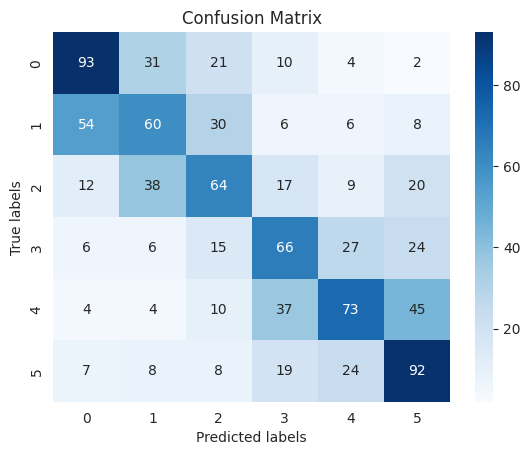

In [17]:
# Evaluating the model with the test data
precision, recall, f1, accuracy=evaluating(y_test,y_pred)

In [22]:
# Predicting difficulty for a new dataset and preparing the submission DataFrame
prediction = df_pred['sentence']
prediction_logistic_regression=pipe.predict(prediction)

submission = df_pred.copy()
submission['difficulty']=prediction_logistic_regression
submission = submission.drop('sentence', axis=1)

In [23]:
# For our streamlit app, we saved the trained model as a pickle string.
saved_model = pickle.dumps(pipe)
# Saving the model to a .pkl file
with open('text_classification_model.pkl', 'wb') as file:
    pickle.dump(pipe, file)

# Initiating the download of the .pkl file
files.download('text_classification_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
from google.colab import files

submission.to_csv('submission.csv', encoding ='utf-8-sig',index=True)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
tfidf = TfidfVectorizer()
pipe = Pipeline([('vectorizer', tfidf),('classifier', knn)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred=pipe.predict(X_test)

Accuracy score: 0.3198
Precision: 0.4021
Recall: 0.3194
F1 Score: 0.3029


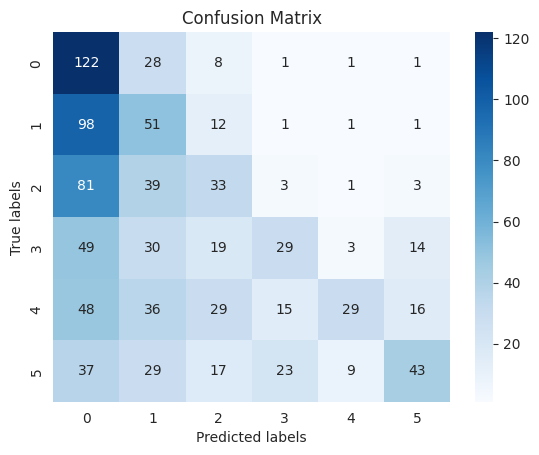

In [ ]:
precision, recall, f1, accuracy = evaluating(y_test,y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining a range of 'k' values for KNeighborsClassifier
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

# Creating a GridSearchCV object for finding the best k
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy', return_train_score = False, verbose = 1)

#Creates a pipeline that first applies the TF-IDF vectorization to the input data, then feeds it into the knn_cv classifier.
pipe=Pipeline([('vectorizer', tfidf),('classifier', knn_cv)])
pipe.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19]},
                              scoring='accuracy', verbose=1))])

In [ ]:
y_pred=pipe.predict(X_test)

Accuracy score: 0.3667
Precision: 0.4090
Recall: 0.3668
F1 Score: 0.3581


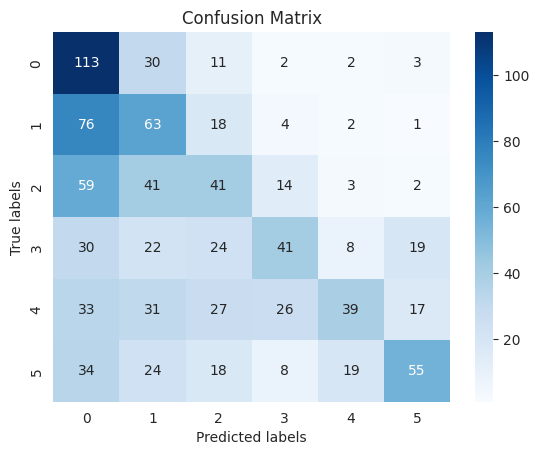

In [ ]:
precision, recall, f1, accuracy = evaluating(y_test,y_pred)

In [ ]:
# Retrieving the best parameters found by GridSearchCV
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
# Retrieving the best score achieved during GridSearchCV
knn_cv.best_score_

0.3377604166666667

In [ ]:
prediction_knn=pipe.predict(df_pred['sentence'])


# **Decision Tree**


Accuracy score: 0.3135
Precision: 0.3153
Recall: 0.3136
F1 Score: 0.3113


(0.3152978706841552,
 0.3135724971994014,
 0.3113053733092557,
 0.31354166666666666)

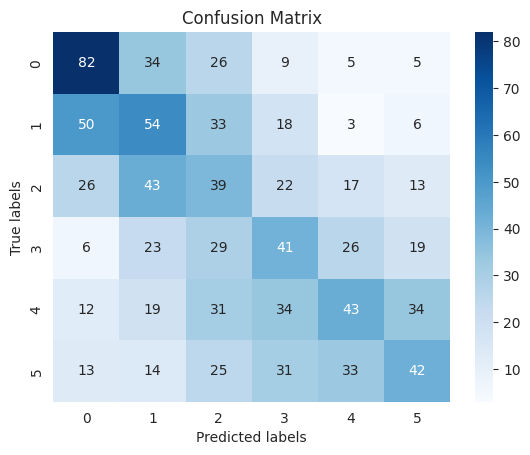

In [ ]:
classifier = DecisionTreeClassifier()

pipe = Pipeline([('vectorizer', tfidf), ('classifier', classifier)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

evaluating(y_test, y_pred)

# **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
Randfor=RandomForestClassifier()

In [ ]:
tfidf = TfidfVectorizer()

pipe = Pipeline([('vectorizer', tfidf), ('classifier', Randfor)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred=pipe.predict(X_test)

Accuracy score: 0.4177
Precision: 0.4303
Recall: 0.4202
F1 Score: 0.4074


(0.43026043782843315,
 0.42018380696849206,
 0.40741396488188286,
 0.41770833333333335)

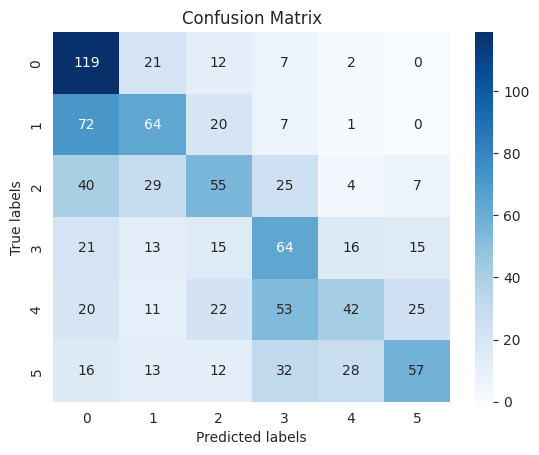

In [ ]:
evaluating(y_test,y_pred)

# **Ridge regression**

Accuracy score: 0.4740
Precision: 0.4739
Recall: 0.4752
F1 Score: 0.4709


(0.47390034987824725,
 0.4751824629834793,
 0.47086015131623243,
 0.4739583333333333)

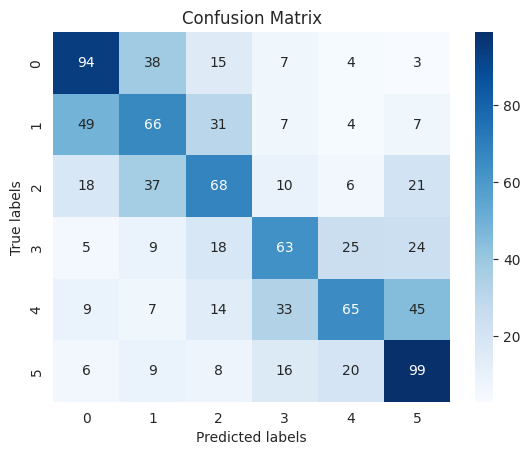

In [ ]:
ridge = RidgeClassifier()
tfidf = TfidfVectorizer()

pipe = Pipeline([('vectorizer', tfidf), ('classifier', ridge)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

evaluating(y_test, y_pred)

# **Logistic regression with Data cleaning**

In [43]:
# Download necessary NLTK data
nltk.download(['punkt', 'averaged_perceptron_tagger', 'wordnet', 'stopwords', 'omw-1.4'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Clean the input text. It performs operations like converting text to lowercase, stripping whitespace, removing HTML tags, punctuation, and numbers. The goal is to standardize the text for better analysis.


In [44]:
# Text Preprocessing
def preprocess(text):
    # Lowercasing, stripping whitespace, removing punctuation, etc.
    text = text.lower().strip()
    text = re.sub('<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\d', ' ', text)
    return text

Removes stopwords (commonly used words that don't contribute much to the meaning of a sentence, here specifically for French) and lemmatizes the words (reduces words to their base or root form).


In [45]:
# Stopword Removal and Lemmatization
def clean_text(text):
    stop_words = set(stopwords.words('french'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(preprocess(text))
    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    return cleaned_text

In [46]:
# Apply preprocessing
df['clean_sentence'] = df['sentence'].apply(clean_text)

In [47]:
# Splitting Data
X = df['clean_sentence']
y = df['difficulty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The pipeline includes a TF-IDF vectorizer (TfidfVectorizer) to convert text data into a format suitable for machine learning, followed by a logistic regression classifier (LogisticRegression).



In [49]:
# Pipeline Creation
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

Grid search (GridSearchCV) is used for hyperparameter tuning. It tests combinations of parameters for the TF-IDF vectorizer (n-gram range) and the logistic regression classifier (regularization strength C) to find the best choice of these parameters

In [50]:
# Hyperparameter Tuning
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__C': [0.1, 1, 10]
}

Accuracy score: 0.4385
Precision: 0.4418
Recall: 0.4396
F1 Score: 0.4360


(0.44179707218310066,
 0.4396263708809958,
 0.43600590995589283,
 0.43854166666666666)

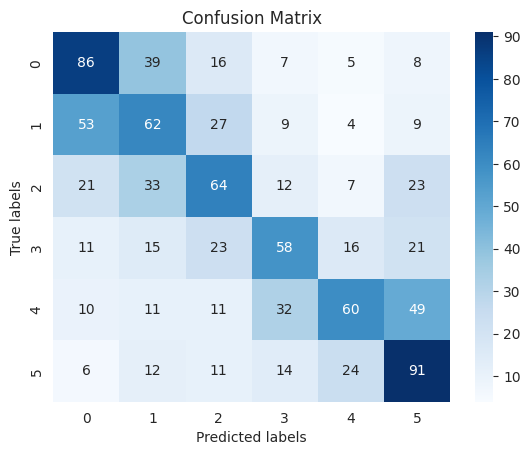

In [55]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluation
predicted = grid_search.predict(X_test)

evaluating(y_test,predicted)

# **SVC (RBF)**

Load the spaCy model efficiently by checking if it's already available.



In [25]:
# Load the French language model
def load_french_model():
    model_name = "fr_core_news_lg"
    spacy.cli.download(model_name)
    return spacy.load(model_name)

french_nlp = load_french_model()

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_lg')


Create a function for vectorizing sentences to avoid code repetition.



In [26]:
# Function to generate sentence vectors
def get_sentence_vectors(data, nlp_model):
    with nlp_model.disable_pipes():
        return np.array([nlp_model(sentence).vector for sentence in data.sentence])

sentence_vectors = get_sentence_vectors(df, french_nlp)

In [27]:
# Define features and target variable
features = sentence_vectors
target = df.difficulty

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [41]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_details=""):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{model.__class__.__name__} ({model_details}) Accuracy: {accuracy:.4f}")

In [42]:
# Train and evaluate models
train_and_evaluate_model(LinearSVC(random_state=0, dual=False), X_train, y_train, X_test, y_test, "Linear")
train_and_evaluate_model(SVC(kernel='sigmoid'), X_train, y_train, X_test, y_test, "Sigmoid")
train_and_evaluate_model(SVC(kernel='poly', degree=3), X_train, y_train, X_test, y_test, "Polynomial Degree 3")
train_and_evaluate_model(SVC(kernel='linear'), X_train, y_train, X_test, y_test, "Linear")
train_and_evaluate_model(SVC(kernel='rbf'), X_train, y_train, X_test, y_test, "RBF")

LinearSVC (Linear) Accuracy: 0.4948
SVC (Sigmoid) Accuracy: 0.3708
SVC (Polynomial Degree 3) Accuracy: 0.4802
SVC (Linear) Accuracy: 0.4604
SVC (RBF) Accuracy: 0.4990


The best kernel is rbf for default parameters, now we will look at different parameters to optimize the fitting with this one.

Implement GridSearchCV for hyperparameter tuning instead of manually setting parameters.

In [31]:
# Use GridSearchCV for hyperparameter tuning
parameters = {'C': [1, 5, 9, 10, 11, 15], 'gamma': [0.001, 0.005, 0.0001], 'kernel': ['rbf'],'degree':[2,3,4]}
svc = SVC()
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 11, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Best score: 0.5018


Accuracy score: 0.5062
Precision: 0.5038
Recall: 0.5054
F1 Score: 0.5035


(0.5038183607007957, 0.5054266632554129, 0.5034544258439461, 0.50625)

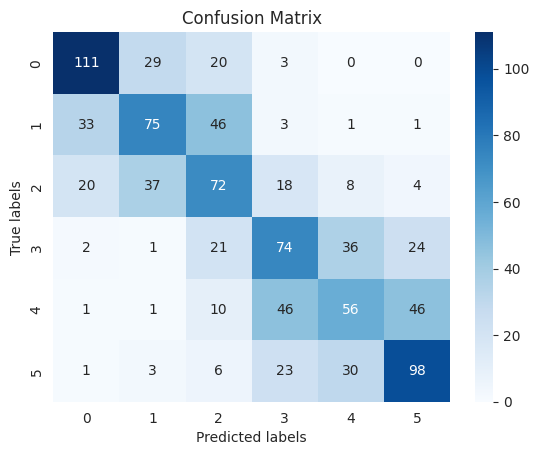

In [32]:
# Evaluate model on test data
y_pred = grid_search.predict(X_test)
evaluating(y_test, y_pred)

In [33]:
# Vectorize the unlabelled data for predictions
unlabelled_vectors = get_sentence_vectors(df_pred, french_nlp)

# Generate predictions using the final model
predicted_difficulty = grid_search.predict(unlabelled_vectors)

In [35]:
# Prepare the submission file
df_example_submission.difficulty = predicted_difficulty
df_example_submission.to_csv("submission.csv", index=False)

# Download the submission file
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>